In [1]:
import requests,json,urllib,time

In [2]:
apiKey=os.getenv('CKANAPIKEY')

if apiKey is None:
    raise EnvironmentError("Failed because {} is not set.".format('CKANAPIKEY'))
sageCommonsURL='http://hotshot.sdsc.edu:5000/'

## query daily

In [3]:
apiAction = 'api/3/action/datastore_search_sql?sql='
sqlURL ='http://hotshot.sdsc.edu:5000/api/3/action/datastore_search_sql?sql=SELECT%20*%20from%20%22bc2ada72-5377-4c0a-8577-e69ba5345c2a%22'
# print(encodedSqlURL)
start = time.time() # start timing
response = requests.request("GET", sqlURL)
end = time.time()
elapsedTimeDaily = end - start
responseJSONDaily = response.json()
print(response)

<Response [200]>


In [4]:
responseJSONDaily['result']

{'records': [{'subsystem': 'chemsense',
   'value_hrf': 'NA',
   'timestamp': '2020-10-25T17:54:14',
   'parameter': 'uv_intensity',
   '_full_text': "'-10':2 '-25':3 '001e061183':7 '14':6 '2020':1 '54':5 '83':13 'bf':8 'chemsens':9 'intens':12 'na':14 'si1145':10 't17':4 'uv':11",
   'node_id': '001e061183bf',
   'value_raw': '83',
   '_id': 532317,
   'sensor': 'si1145'},
  {'subsystem': 'chemsense',
   'value_hrf': 'NA',
   'timestamp': '2020-10-25T17:54:14',
   'parameter': 'visible_light_intensity',
   '_full_text': "'-10':2 '-25':3 '001e061183':7 '14':6 '2020':1 '456':14 '54':5 'bf':8 'chemsens':9 'intens':13 'light':12 'na':15 'si1145':10 't17':4 'visibl':11",
   'node_id': '001e061183bf',
   'value_raw': '456',
   '_id': 532318,
   'sensor': 'si1145'},
  {'subsystem': 'chemsense',
   'value_hrf': '0.11192',
   'timestamp': '2020-10-25T17:54:14',
   'parameter': 'concentration',
   '_full_text': "'-10':2 '-25':3 '0.11192':13 '001e061183':7 '1202.0':12 '14':6 '2020':1 '54':5 'bf'

In [5]:
numDaily = len(responseJSONDaily['result']['records'])
print('numDaily: ' + str(numDaily))
print(elapsedTimeDaily)

numDaily: 678333
303.9923610687256


## query weekly

In [6]:
apiAction = 'api/3/action/datastore_search_sql?sql='
sqlURL ='http://hotshot.sdsc.edu:5000/api/3/action/datastore_search_sql?sql=SELECT%20*%20from%20%22dc6cbef7-a35a-461e-8423-115decb83cc1%22'
start = time.time() # start timing
response = requests.request("GET", sqlURL)
end = time.time()
elapsedTimeWeekly = end - start
responseJSONWeekly = response.json()
print(response)

<Response [200]>


In [7]:
responseJSONWeekly['result']

{'records': [{'subsystem': 'metsense',
   'value_hrf': '-0.977',
   'timestamp': '2020-10-19T05:49:50',
   'parameter': 'acceleration_z',
   '_full_text': "'-0.977':14 '-10':2 '-19':3 '001e06113':7 '2020':1 '49':5 '50':6 '65535':13 'acb':8 'acceler':11 'metsens':9 'mma8452q':10 't05':4 'z':12",
   'node_id': '001e06113acb',
   'value_raw': '65535',
   '_id': 241077,
   'sensor': 'mma8452q'},
  {'subsystem': 'metsense',
   'value_hrf': '5.5',
   'timestamp': '2020-10-19T05:49:50',
   'parameter': 'temperature',
   '_full_text': "'-10':2 '-19':3 '001e06113':7 '2020':1 '49':5 '5.5':13 '50':6 '670':12 'acb':8 'metsens':9 'pr103j2':10 't05':4 'temperatur':11",
   'node_id': '001e06113acb',
   'value_raw': '670',
   '_id': 241078,
   'sensor': 'pr103j2'},
  {'subsystem': 'metsense',
   'value_hrf': '66.26',
   'timestamp': '2020-10-19T05:49:50',
   'parameter': 'intensity',
   '_full_text': "'-10':2 '-19':3 '001e06113':7 '2020':1 '49':5 '50':6 '66.26':14 'acb':8 'b':11 'intens':12 'metsens':

In [8]:
numWeekly = len(responseJSONWeekly['result']['records'])
print('numWeekly: ' + str(numWeekly))
print('time:' + str(elapsedTimeWeekly))

numWeekly: 2270500
time:942.5727107524872


## query monthly

## summary plot

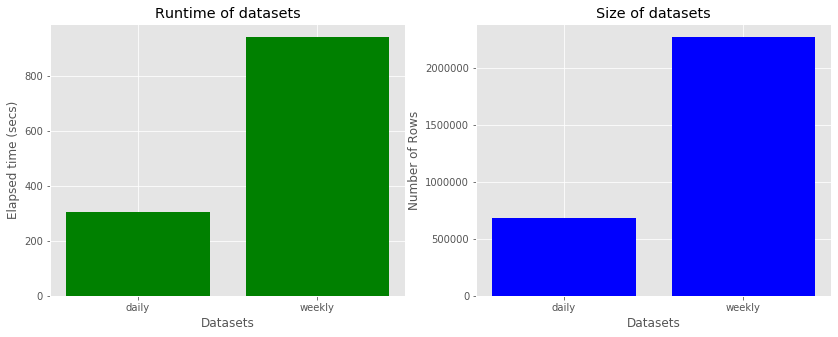

In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

x = ['daily', 'weekly']
time = [elapsedTimeDaily, elapsedTimeWeekly]
entries = [numDaily, numWeekly]

xPos = [i for i, _ in enumerate(x)]

plt.figure(num=None, figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.bar(xPos, time, color='green')
plt.xlabel("Datasets")
plt.ylabel("Elapsed time (secs)")
plt.title("Runtime of datasets")
plt.xticks(xPos, x)

plt.subplot(1, 2, 2)
plt.bar(xPos, entries, color='blue')
plt.xlabel("Datasets")
plt.ylabel("Number of Rows")
plt.title("Size of datasets")
plt.xticks(xPos, x)

plt.show()
